In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

1.1.5
1.19.1


In [2]:
df_raw_covidcase = pd.read_csv("raw/extend_tillAug/COVID-19_aantallen_gemeente_per_dag.csv", error_bad_lines=False, sep=';')
df_raw_wastewater = pd.read_csv("raw/extend_tillAug/COVID-19_rioolwaterdata.csv", error_bad_lines=False, sep=';')
df_raw_vaccines = pd.read_csv("raw/vaccines_administered_nl.csv", error_bad_lines=False) ### vaccine data not updated in the database =) use the old version
df_raw_tests = pd.read_csv('raw/extend_tillAug/COVID-19_uitgevoerde_testen.csv',error_bad_lines=False,sep=';')
df_variant = pd.read_csv('raw/extend_tillAug/COVID-19_varianten.csv',error_bad_lines=False,sep=';')

In [3]:
df_variant.tail()


,Version,Date_of_report,Date_of_statistics_week_start,Variant_code,Variant_name,ECDC_category,WHO_category,Is_subvariant_of,Sample_size,Variant_cases
1330,4,2022-08-30 00:33:11,2022-08-08,B.1.351,Beta,DEV,NaN,NaN,975,0
1331,4,2022-08-30 00:33:11,2022-08-08,P.1,Gamma,DEV,NaN,NaN,975,0
1332,4,2022-08-30 00:33:11,2022-08-08,B.1.1.7,Alpha,DEV,NaN,NaN,975,0
1333,4,2022-08-30 00:33:11,2022-08-08,B.1.621,Mu,DEV,NaN,NaN,975,0
1334,4,2022-08-30 00:33:11,2022-08-08,C.37,Lambda,DEV,NaN,NaN,975,0


In [4]:
df_raw_wastewater.tail()


,Version,Date_of_report,Date_measurement,RWZI_AWZI_code,RWZI_AWZI_name,RNA_flow_per_100000
81655,2,2022-08-31,2022-08-25,20011,Willem Annapolder,35946873715606
81656,2,2022-08-31,2022-08-25,17068,Berkenwoude,18791533922729
81657,2,2022-08-31,2022-08-24,5003,Glanerbrug,19382992888934
81658,2,2022-08-31,2022-08-23,9041,Zaltbommel,12576536749536
81659,2,2022-08-31,2022-08-23,14002,Woerden,1112627421064782


In [5]:
df_raw_covidcase.tail()

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
340747,5,2022-08-31 10:00:00,2022-08-31,NaN,NaN,Limburg,VR24,Limburg-Zuid,GGD Zuid-Limburg,Netwerk Acute Zorg Limburg,2,0
340748,5,2022-08-31 10:00:00,2022-08-31,NaN,NaN,Zuid-Holland,VR15,Haaglanden,GGD Haaglanden,Netwerk Acute Zorg West,2,0
340749,5,2022-08-31 10:00:00,2022-08-31,NaN,NaN,Fryslân,VR02,Fryslân,GGD Fryslân,Acute Zorgnetwerk Noord Nederland,0,0
340750,5,2022-08-31 10:00:00,2022-08-31,NaN,NaN,Noord-Holland,VR11,Zaanstreek-Waterland,GGD Zaanstreek/Waterland,NaN,0,0
340751,5,2022-08-31 10:00:00,2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [6]:
df_raw_vaccines.tail()

,week,year,vaccine,dose_number,total_administered
925,4,2022,UNK,3,49
926,5,2022,UNK,3,50
927,6,2022,UNK,3,27
928,7,2022,UNK,3,51
929,8,2022,UNK,3,5


In [7]:
import datetime
def conversion(x):
    ymd = x.split('-')
    year = datetime.date(int(ymd[0]),int(ymd[1]),int(ymd[2])).isocalendar()[0]
    week = datetime.date(int(ymd[0]),int(ymd[1]),int(ymd[2])).isocalendar()[1]
    return year,week

### variant date cleaning

In [8]:
df_variant_agg = df_variant.groupby(['Date_of_statistics_week_start','Variant_name'])[['Variant_cases']].sum().reset_index()
##  add year column
df_variant_agg['year'] = df_variant_agg['Date_of_statistics_week_start'].apply(lambda x: conversion(x)[0])
## add week column
df_variant_agg['week'] = df_variant_agg['Date_of_statistics_week_start'].apply(lambda x: conversion(x)[1])

df_variant_agg_week = df_variant_agg.groupby(['year','week','Variant_name'])[['Variant_cases']].mean().reset_index()
df_variant_sum = df_variant_agg_week.groupby(['year','week'])[['Variant_cases']].sum().reset_index()
df_variant_agg_week = pd.merge(df_variant_agg_week,df_variant_sum,on=['year','week'],how='outer')
df_variant_agg_week['Variant_cases_perc'] = df_variant_agg_week['Variant_cases_x'].div(df_variant_agg_week['Variant_cases_y'])

In [9]:
df_variant_agg_week.head()

,year,week,Variant_name,Variant_cases_x,Variant_cases_y,Variant_cases_perc
0,2020,49,Alpha,1,1,1.0
1,2020,49,Beta,0,1,0.0
2,2020,49,Delta,0,1,0.0
3,2020,49,Gamma,0,1,0.0
4,2020,49,Lambda,0,1,0.0


In [10]:
df_variant_agg_week.tail()

,year,week,Variant_name,Variant_cases_x,Variant_cases_y,Variant_cases_perc
618,2022,32,Delta,0,1957,0.0
619,2022,32,Gamma,0,1957,0.0
620,2022,32,Lambda,0,1957,0.0
621,2022,32,Mu,0,1957,0.0
622,2022,32,Omicron,1957,1957,1.0


In [11]:
import datetime
def week2date(x):
    input = str(x.year) + ' ' + str(x.week) + ' 1'
    r = datetime.datetime.strptime(input, '%G %V %u').date()
    return r

df_variant_agg_week['strdate'] = df_variant_agg_week.apply(week2date,axis=1)


In [12]:
df_variant_agg_week[df_variant_agg_week['week'] ==52]

,year,week,Variant_name,Variant_cases_x,Variant_cases_y,Variant_cases_perc,strdate
21,2020,52,Alpha,5,6,0.833333,2020-12-21
22,2020,52,Beta,1,6,0.166667,2020-12-21
23,2020,52,Delta,0,6,0.000000,2020-12-21
24,2020,52,Gamma,0,6,0.000000,2020-12-21
25,2020,52,Lambda,0,6,0.000000,2020-12-21
26,2020,52,Mu,0,6,0.000000,2020-12-21
27,2020,52,Omicron,0,6,0.000000,2020-12-21
392,2021,52,Alpha,0,3044,0.000000,2021-12-27
393,2021,52,Beta,0,3044,0.000000,2021-12-27
394,2021,52,Delta,648,3044,0.212878,2021-12-27


In [13]:
df_variant_agg_week = df_variant_agg_week[['strdate','Variant_name','Variant_cases_perc']]
df_variant_agg_week_pivot = df_variant_agg_week.pivot(index='strdate', columns='Variant_name', values='Variant_cases_perc')

In [14]:
df_variant_agg_week_pivot.columns

Index(['Alpha', 'Beta', 'Delta', 'Gamma', 'Lambda', 'Mu', 'Omicron'], dtype='object', name='Variant_name')

In [15]:
df_variant_agg_week_pivot_v2 = df_variant_agg_week_pivot.copy()
df_variant_agg_week_pivot_v2['Other SARS-CoV-2 variants'] = df_variant_agg_week_pivot_v2['Lambda'] + df_variant_agg_week_pivot_v2['Mu']
df_variant_agg_week_pivot_v2 = df_variant_agg_week_pivot_v2.drop(['Lambda','Mu'],axis=1)

### testing data cleaning

In [16]:
df_raw_tests.head()

,Version,Date_of_report,Date_of_statistics,Security_region_code,Security_region_name,Tested_with_result,Tested_positive
0,2,2022-08-31 09:00:00,2020-06-01,VR01,Groningen,3,0
1,2,2022-08-31 09:00:00,2020-06-02,VR01,Groningen,207,0
2,2,2022-08-31 09:00:00,2020-06-03,VR01,Groningen,207,0
3,2,2022-08-31 09:00:00,2020-06-04,VR01,Groningen,241,1
4,2,2022-08-31 09:00:00,2020-06-05,VR01,Groningen,224,0


In [17]:
df_raw_tests_agg = df_raw_tests.groupby(['Date_of_statistics'])[['Tested_with_result','Tested_positive']].sum().reset_index()
df_raw_tests_agg['ratio_of_pos'] = df_raw_tests_agg['Tested_positive'].div(df_raw_tests_agg['Tested_with_result'])
df_raw_tests_agg.tail()

,Date_of_statistics,Tested_with_result,Tested_positive,ratio_of_pos
815,2022-08-25,1525,939,0.615738
816,2022-08-26,1552,984,0.634021
817,2022-08-27,1149,706,0.614447
818,2022-08-28,1101,708,0.643052
819,2022-08-29,1743,1045,0.599541


In [18]:
##  add year column
df_raw_tests_agg['year'] = df_raw_tests_agg['Date_of_statistics'].apply(lambda x: conversion(x)[0])

## add week column
df_raw_tests_agg['week'] = df_raw_tests_agg['Date_of_statistics'].apply(lambda x: conversion(x)[1])

In [19]:
df_raw_tests_agg.tail()

,Date_of_statistics,Tested_with_result,Tested_positive,ratio_of_pos,year,week
815,2022-08-25,1525,939,0.615738,2022,34
816,2022-08-26,1552,984,0.634021,2022,34
817,2022-08-27,1149,706,0.614447,2022,34
818,2022-08-28,1101,708,0.643052,2022,34
819,2022-08-29,1743,1045,0.599541,2022,35


In [20]:
df_raw_tests_week = df_raw_tests_agg.groupby(['week','year'])[['ratio_of_pos','Tested_with_result','Tested_positive']].mean().reset_index()
df_raw_tests_week.sort_values(by=['year','week'],inplace=True)
df_raw_tests_week.head()

,week,year,ratio_of_pos,Tested_with_result,Tested_positive
44,23,2020,0.023885,6980.571429,141.142857
47,24,2020,0.015616,8163.000000,120.857143
50,25,2020,0.009448,8809.428571,81.285714
53,26,2020,0.007330,8761.571429,61.285714
56,27,2020,0.005651,9643.857143,54.571429


### wwtp data cleaning

In [21]:
## filter poor data from wwtps
filt_wwtp = df_raw_wastewater.groupby(['RWZI_AWZI_name']).size() < 100
filt_wwtp_lst = filt_wwtp[filt_wwtp].index.tolist()
df_raw_wastewater = df_raw_wastewater[~df_raw_wastewater['RWZI_AWZI_name'].isin(filt_wwtp_lst)]

In [22]:
## aggregate RNA flow based on dates
df_raw_wastewater_agg = df_raw_wastewater.groupby(['Date_measurement'])['RNA_flow_per_100000'].sum().to_frame()
df_raw_wastewater_agg = df_raw_wastewater_agg.reset_index()

##  add year column
df_raw_wastewater_agg['year'] = df_raw_wastewater_agg['Date_measurement'].apply(lambda x:conversion(x)[0])

## add week column
df_raw_wastewater_agg['week'] = df_raw_wastewater_agg['Date_measurement'].apply(lambda x: conversion(x)[1])

## average RNA flow based on week numbers
df_raw_wastewater_week = df_raw_wastewater_agg.groupby(['week','year'])['RNA_flow_per_100000'].mean().to_frame().add_suffix('_Count').reset_index()
df_raw_wastewater_week.sort_values(by=['year','week'],inplace=True)

In [23]:
df_raw_wastewater_week.tail()

,week,year,RNA_flow_per_100000_Count
76,30,2022,1.874913e+16
79,31,2022,1.343545e+16
82,32,2022,9.620926e+15
85,33,2022,9.222537e+15
88,34,2022,7.674426e+15


### covid data cleaning

In [24]:
df_raw_covidcase_agg = df_raw_covidcase.groupby('Date_of_publication')['Total_reported'].sum().to_frame().reset_index()
df_raw_covidcase_agg['year'] = df_raw_covidcase_agg['Date_of_publication'].apply(lambda x: conversion(x)[0])
df_raw_covidcase_agg['week'] = df_raw_covidcase_agg['Date_of_publication'].apply(lambda x: conversion(x)[1])

df_raw_covidcase_week = df_raw_covidcase_agg.groupby(['year','week']).mean().reset_index()
df_raw_covidcase_week.sort_values(by=['year','week'],inplace=True)

In [25]:
df_raw_covidcase_week.tail()

,year,week,Total_reported
127,2022,31,2405.000000
128,2022,32,1741.428571
129,2022,33,1378.714286
130,2022,34,1115.000000
131,2022,35,1088.333333


### vaccine data cleaning

In [26]:
df_raw_vaccines_agg = df_raw_vaccines.groupby(['year','week'])['total_administered'].sum().to_frame().reset_index()
df_raw_vaccines_agg['accum_total_administered'] = df_raw_vaccines_agg['total_administered'].cumsum()
df_raw_vaccines_agg.sort_values(by=['year','week'],inplace=True)
df_raw_vaccines_agg.head()

,year,week,total_administered,accum_total_administered
0,2020,52,0,0
1,2020,53,0,0
2,2021,1,33759,33759
3,2021,2,43204,76963
4,2021,3,89355,166318


In [27]:
df_raw_vaccines_agg.tail()

,year,week,total_administered,accum_total_administered
57,2022,4,292210,33427471
58,2022,5,223434,33650905
59,2022,6,137469,33788374
60,2022,7,74039,33862413
61,2022,8,58899,33921312


In [28]:
df_raw_vaccines_2jabs = df_raw_vaccines[df_raw_vaccines['dose_number'] == 2]
df_raw_vaccines_2jabs_agg = df_raw_vaccines_2jabs.groupby(['year','week'])['total_administered'].sum().to_frame().reset_index()
df_raw_vaccines_2jabs_agg['accum_total_administered'] = df_raw_vaccines_2jabs_agg['total_administered'].cumsum()

df_raw_vaccines_2jabs_agg.sort_values(by=['year','week'],inplace=True)
df_raw_vaccines_2jabs_agg.head()
df_raw_vaccines_2jabs_agg.columns = ['year', 'week', 'total_administered_2jabs','accum_total_administered_2jabs']

In [29]:
df_raw_vaccines_2jabs_agg.head()

,year,week,total_administered_2jabs,accum_total_administered_2jabs
0,2020,52,0,0
1,2020,53,0,0
2,2021,1,0,0
3,2021,2,0,0
4,2021,3,0,0


### merge three dataframes together

In [30]:
merge = pd.merge(df_raw_wastewater_week,df_raw_covidcase_week,left_on=['year','week'],right_on=['year','week'],how='outer')
merge = pd.merge(merge,df_raw_vaccines_agg,left_on=['year','week'],right_on=['year','week'],how='outer')
merge = pd.merge(merge,df_raw_vaccines_2jabs_agg,left_on=['year','week'],right_on=['year','week'],how='outer')
merge = pd.merge(merge,df_raw_tests_week,left_on=['year','week'],right_on=['year','week'],how='outer')

In [31]:
merge['WC_ratio'] = merge['RNA_flow_per_100000_Count'].div(merge['Total_reported'])
total_pop = 17199386  # total pop in netherland
merge['percentage_accum_total_administered_2jabs'] = merge['accum_total_administered_2jabs'].div(total_pop)
merge.sort_values(by=['year', 'week'], inplace=True)
merge.insert(0, 'TimeID', range(1, 1+len(merge)))
merge.head()

,TimeID,week,year,RNA_flow_per_100000_Count,Total_reported,total_administered,accum_total_administered,total_administered_2jabs,accum_total_administered_2jabs,ratio_of_pos,Tested_with_result,Tested_positive,WC_ratio,percentage_accum_total_administered_2jabs
126,1,9,2020,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2,10,2020,NaN,22.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,3,11,2020,NaN,135.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,4,12,2020,NaN,439.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,5,13,2020,NaN,936.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_variant_agg_week_pivot_v2.tail()
merge = merge.iloc[:-3,:] ### keep all the datasets have the consistent ending time cut-off

### converting week number to exact datetime

In [33]:
import datetime
def week2date(x):
    input = str(int(x.year)) + ' ' + str(int(x.week)) + ' 1'
    r = datetime.datetime.strptime(input, '%G %V %u').date()
    return r

merge['strdate'] = merge.apply(week2date,axis=1)

### final plots

In [34]:
submerge = merge[['strdate', 'RNA_flow_per_100000_Count', 'Tested_with_result',
                  'Tested_positive', 'WC_ratio', 'percentage_accum_total_administered_2jabs']]
submerge_removenan = submerge.dropna(subset=['Tested_with_result'])
submerge_removenan[['Tested_with_result']]


,Tested_with_result
9,6980.571429
10,8163.000000
11,8809.428571
12,8761.571429
13,9643.857143
...,...
119,7133.714286
120,4850.000000
121,4048.000000
122,2766.571429


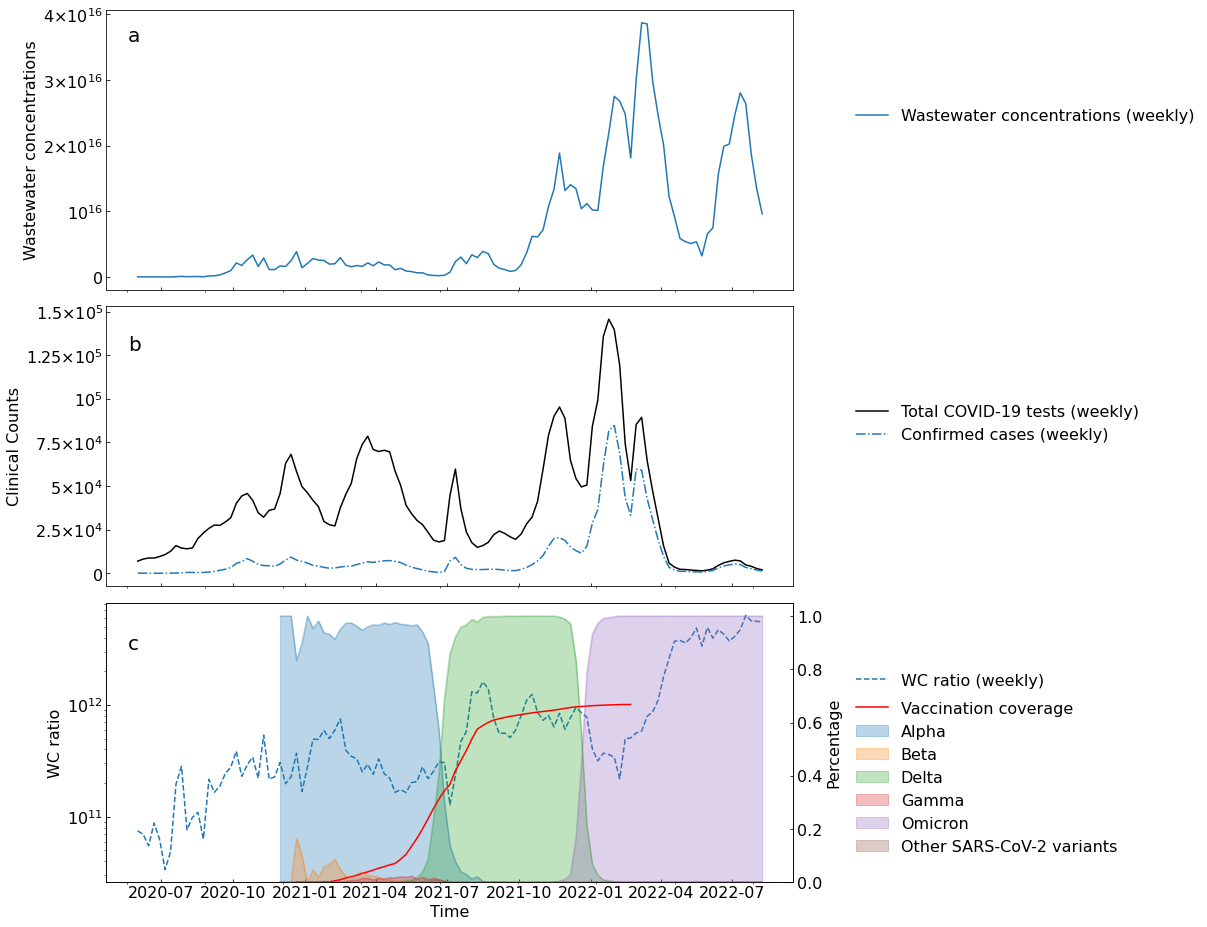

In [35]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(17,13),sharex=True)
sns.lineplot(data=submerge_removenan, x='strdate',y='RNA_flow_per_100000_Count',ax=ax1,color='#1f77b4',label='Wastewater concentrations (weekly)')
ax1.set_ylabel('Wastewater concentrations\n per 100000 count')


sns.lineplot(data=submerge_removenan, x='strdate',y='Tested_with_result',ax=ax2,color='black',label='Total COVID-19 tests (weekly)')
sns.lineplot(data=submerge_removenan, x='strdate',y='Tested_positive',color='#1f77b4', ax=ax2, label='Confirmed cases (weekly)',linestyle='-.') # #00008b
ax2.set_ylabel('Tests with a result \n and a positive result')
handles, labels = ax2.get_legend_handles_labels()

sns.lineplot(data=submerge_removenan, x='strdate',
             y='WC_ratio', ax=ax3, color='#1f77b4', label='WC ratio (weekly)', linestyle='--')
             
ax6 = ax3.twinx()
sns.lineplot(data=submerge_removenan, x='strdate', y='percentage_accum_total_administered_2jabs',
             ax=ax6, color='r', label='Vaccination coverage')

ax6.yaxis.tick_right()
ax6.set_ylabel('Percentage', fontsize=16)

df_variant_agg_week_pivot_v2.plot(kind='area',stacked=False,ax=ax6,alpha=0.3)

# for ax in [ax1, ax2, ax3, ax6]:
#     ax.legend(frameon=False)
#     leg = ax.legend()
#     leg.get_frame().set_linewidth(0.0)

ax1.legend(bbox_to_anchor=(1.07, 0.7), fontsize=16, frameon=False)
ax2.legend(bbox_to_anchor=(1.07,0.7),fontsize=16,frameon=False)
ax6.legend(bbox_to_anchor=(1.07, 0.7),fontsize=16,frameon=False)
ax3.legend(bbox_to_anchor=(1.07, 0.8), fontsize=16, frameon=False)

ax3.set_yscale('log')
ax3.set_xlabel('Time', fontsize=16)

ax1.set_ylabel('Wastewater concentrations',fontsize=16)
ax2.set_ylabel('Clinical Counts', fontsize=16)
ax3.set_ylabel('WC ratio', fontsize=16)

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(g))
ax2.get_yaxis().set_major_formatter(mticker.FuncFormatter(g))
ax3.get_yaxis().set_major_formatter(mticker.FuncFormatter(g))

for ax in [ax1,ax2,ax3,ax6]:
    ax.tick_params(axis='both', labelsize=16, direction="in")

plt.figtext(0.1, 0.3, 'c',fontsize=20)
plt.figtext(0.1, 0.62, 'b',fontsize=20)
plt.figtext(0.1, 0.95, 'a',fontsize=20)

plt.tight_layout()
plt.savefig('plots/final.tillAug2022.png',dpi=300)
